<a href="https://colab.research.google.com/github/aisha7da/Task4-internship/blob/main/task4_internship.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


In [2]:
df = pd.read_csv("/content/kaggle_survey_2017_2021.csv.zip", low_memory=False)

In [3]:
df

,-,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,...,Q38_B_Part_1,Q38_B_Part_2,Q38_B_Part_3,Q38_B_Part_4,Q38_B_Part_5,Q38_B_Part_6,Q38_B_Part_7,Q38_B_Part_9,Q38_B_Part_11,Q38_B_OTHER
0,Year,Duration (in seconds),What is your age (# years)?,What is your gender? - Selected Choice,In which country do you currently reside?,What is the highest level of formal education ...,Select the title most similar to your current ...,For how many years have you been writing code ...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,...,"In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor..."
1,2021,910,50-54,Man,India,Bachelorâ€™s degree,Other,5-10 years,Python,R,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2021,784,50-54,Man,Indonesia,Masterâ€™s degree,Program/Project Manager,20+ years,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2021,924,22-24,Man,Pakistan,Masterâ€™s degree,Software Engineer,1-3 years,Python,NaN,...,NaN,NaN,NaN,NaN,TensorBoard,NaN,NaN,NaN,NaN,NaN
4,2021,575,45-49,Man,Mexico,Doctoral degree,Research Scientist,20+ years,Python,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106297,2017,NaN,22-24,Female,Other,Master's degree,NaN,Less than a year,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
106298,2017,NaN,25-29,Male,Indonesia,Bachelor's degree,Programmer,1 to 2 years,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
106299,2017,NaN,25-29,Female,Taiwan,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
106300,2017,NaN,NaN,Female,Singapore,I prefer not to answer,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.shape

(106302, 293)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106302 entries, 0 to 106301
Columns: 293 entries, - to Q38_B_OTHER
dtypes: object(293)
memory usage: 237.6+ MB


In [6]:
df.duplicated().sum()

np.int64(4456)

In [7]:
df = df.drop_duplicates()

In [8]:
df.describe()

,-,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,...,Q38_B_Part_1,Q38_B_Part_2,Q38_B_Part_3,Q38_B_Part_4,Q38_B_Part_5,Q38_B_Part_6,Q38_B_Part_7,Q38_B_Part_9,Q38_B_Part_11,Q38_B_OTHER
count,101846,89545,101490,101784,101765,100007,96931,89975,65943,20885,...,2212,2761,1128,1022,7439,1287,1218,1186,1,629
unique,6,11716,12,10,78,13,36,21,2,2,...,2,2,2,2,2,2,2,2,1,2
top,2021,498,25-29,Male,India,Masterâ€™s degree,Student,3-5 years,Python,R,...,Neptune.ai,Weights & Biases,Comet.ml,Sacred + Omniboard,TensorBoard,Guild.ai,Polyaxon,Domino Model Monitor,"In the next 2 years, do you hope to become mor...",Other
freq,25973,107,22420,45220,23936,37391,21237,15995,65942,20884,...,2211,2760,1127,1021,7438,1286,1217,1185,1,628


In [9]:
df.describe().T

,count,unique,top,freq
-,101846,6,2021,25973
Time from Start to Finish (seconds),89545,11716,498,107
Q1,101490,12,25-29,22420
Q2,101784,10,Male,45220
Q3,101765,78,India,23936
...,...,...,...,...
Q38_B_Part_6,1287,2,Guild.ai,1286
Q38_B_Part_7,1218,2,Polyaxon,1217
Q38_B_Part_9,1186,2,Domino Model Monitor,1185
Q38_B_Part_11,1,1,"In the next 2 years, do you hope to become mor...",1


In [10]:
df_new = df.dropna(thresh=0.5*len(df), axis=1)

In [11]:
df_new = df_new.dropna(subset=["Q1"])

In [12]:
for column in df_new.select_dtypes(include='object'):
    #this is to remove leading spaces from strings in column
    df_new[column] = df_new[column].apply(
        lambda value: value.strip() if isinstance(value, str) else value
    )


In [13]:
df

,-,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,...,Q38_B_Part_1,Q38_B_Part_2,Q38_B_Part_3,Q38_B_Part_4,Q38_B_Part_5,Q38_B_Part_6,Q38_B_Part_7,Q38_B_Part_9,Q38_B_Part_11,Q38_B_OTHER
0,Year,Duration (in seconds),What is your age (# years)?,What is your gender? - Selected Choice,In which country do you currently reside?,What is the highest level of formal education ...,Select the title most similar to your current ...,For how many years have you been writing code ...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,...,"In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor..."
1,2021,910,50-54,Man,India,Bachelorâ€™s degree,Other,5-10 years,Python,R,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2021,784,50-54,Man,Indonesia,Masterâ€™s degree,Program/Project Manager,20+ years,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2021,924,22-24,Man,Pakistan,Masterâ€™s degree,Software Engineer,1-3 years,Python,NaN,...,NaN,NaN,NaN,NaN,TensorBoard,NaN,NaN,NaN,NaN,NaN
4,2021,575,45-49,Man,Mexico,Doctoral degree,Research Scientist,20+ years,Python,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106295,2017,NaN,30-34,Male,People 's Republic of China,Master's degree,DBA/Database Engineer,3 to 5 years,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
106297,2017,NaN,22-24,Female,Other,Master's degree,NaN,Less than a year,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
106298,2017,NaN,25-29,Male,Indonesia,Bachelor's degree,Programmer,1 to 2 years,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
106300,2017,NaN,NaN,Female,Singapore,I prefer not to answer,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
categorical_cols = df_new.select_dtypes(include='object').columns.tolist()
for col in categorical_cols:
    print(col)

-
Time from Start to Finish (seconds)
Q1
Q2
Q3
Q4
Q5
Q6
Q7_Part_1
Q8
Q13
Q14_Part_1
Q15
Q23
Q25


In [15]:
df_new = df.iloc[1:].copy()
df_new.columns = df.iloc[0]


In [16]:
# Q1: Age
age_mapping = {
    '18-21': 0, '22-24': 1, '25-29': 2, '30-34': 3, '35-39': 4,
    '40-44': 5, '45-49': 6, '50-54': 7, '55-59': 8, '60-64': 9,
    '65-69': 10, '70+': 11
}

<Axes: title={'center': 'Gender Distribution'}, xlabel='What is your gender? - Selected Choice'>

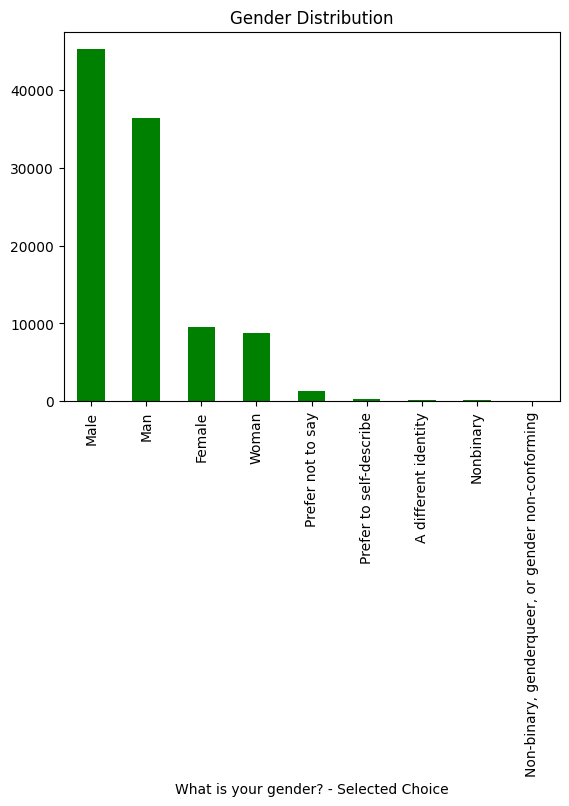

In [17]:
df_new['What is your gender? - Selected Choice'].value_counts().plot(kind='bar', title='Gender Distribution', color='g')

In [18]:
# Q2: Gender
gender_mapping = {
    'Man': 0, 'Woman': 1, 'Nonbinary': 2, 'Prefer not to say': 3,
    'Prefer to self-describe': 4, 'Male': 0, 'Female': 1,
    'A different identity': 2, 'Non-binary, genderqueer, or gender non-conforming': 2
}


In [19]:
# Q4: Education
education_mapping = {
    'No formal education past high school': 0, 'Professional degree': 1,
    'Some college/university study without earning a bachelor’s degree': 2,
    'Bachelor’s degree': 3, 'Master’s degree': 4, 'Doctoral degree': 5,
    "Bachelor's degree": 3, "Master's degree": 4
}

In [20]:
df_new['What is your age (# years)?'] = df_new['What is your age (# years)?'].map(age_mapping)
df_new['What is your gender? - Selected Choice'] = df_new['What is your gender? - Selected Choice'].map(gender_mapping)
df_new['What is the highest level of formal education that you have attained or plan to attain within the next 2 years?'] = df_new['What is the highest level of formal education that you have attained or plan to attain within the next 2 years?'].map(education_mapping)

In [21]:
df_new

,Year,Duration (in seconds),What is your age (# years)?,What is your gender? - Selected Choice,In which country do you currently reside?,What is the highest level of formal education that you have attained or plan to attain within the next 2 years?,Select the title most similar to your current role (or most recent title if retired): - Selected Choice,For how many years have you been writing code and/or programming?,What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - Python,What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - R,...,"In the next 2 years, do you hope to become more familiar with any of these tools for managing ML experiments? (Select all that apply) - Selected Choice - Neptune.ai","In the next 2 years, do you hope to become more familiar with any of these tools for managing ML experiments? (Select all that apply) - Selected Choice - Weights & Biases","In the next 2 years, do you hope to become more familiar with any of these tools for managing ML experiments? (Select all that apply) - Selected Choice - Comet.ml","In the next 2 years, do you hope to become more familiar with any of these tools for managing ML experiments? (Select all that apply) - Selected Choice - Sacred + Omniboard","In the next 2 years, do you hope to become more familiar with any of these tools for managing ML experiments? (Select all that apply) - Selected Choice - TensorBoard","In the next 2 years, do you hope to become more familiar with any of these tools for managing ML experiments? (Select all that apply) - Selected Choice - Guild.ai","In the next 2 years, do you hope to become more familiar with any of these tools for managing ML experiments? (Select all that apply) - Selected Choice - Polyaxon","In the next 2 years, do you hope to become more familiar with any of these tools for managing ML experiments? (Select all that apply) - Selected Choice - Domino Model Monitor","In the next 2 years, do you hope to become more familiar with any of these tools for managing ML experiments? (Select all that apply) - Selected Choice - None","In the next 2 years, do you hope to become more familiar with any of these tools for managing ML experiments? (Select all that apply) - Selected Choice - Other"
1,2021,910,7.0,0.0,India,NaN,Other,5-10 years,Python,R,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2021,784,7.0,0.0,Indonesia,NaN,Program/Project Manager,20+ years,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2021,924,1.0,0.0,Pakistan,NaN,Software Engineer,1-3 years,Python,NaN,...,NaN,NaN,NaN,NaN,TensorBoard,NaN,NaN,NaN,NaN,NaN
4,2021,575,6.0,0.0,Mexico,5.0,Research Scientist,20+ years,Python,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2021,781,6.0,0.0,India,5.0,Other,< 1 years,Python,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106295,2017,NaN,3.0,0.0,People 's Republic of China,4.0,DBA/Database Engineer,3 to 5 years,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
106297,2017,NaN,1.0,1.0,Other,4.0,NaN,Less than a year,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
106298,2017,NaN,2.0,0.0,Indonesia,3.0,Programmer,1 to 2 years,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
106300,2017,NaN,NaN,1.0,Singapore,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
columns_to_drop = [
    'Time from Start to Finish (seconds)',
    'Q38_B_Part_1',
    'Q38_B_Part_2',
    'Q38_B_Part_3',
    'Q38_B_Part_4',
    'Q38_B_Part_5',
    'Q38_B_Part_6',
    'Q38_B_Part_7',
    'Q38_B_Part_9',
    'Q38_B_Part_11',
    'Q38_B_OTHER'

]
df_new = df_new.drop(columns=columns_to_drop, errors='ignore')

In [23]:
df_new

,Year,Duration (in seconds),What is your age (# years)?,What is your gender? - Selected Choice,In which country do you currently reside?,What is the highest level of formal education that you have attained or plan to attain within the next 2 years?,Select the title most similar to your current role (or most recent title if retired): - Selected Choice,For how many years have you been writing code and/or programming?,What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - Python,What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - R,...,"In the next 2 years, do you hope to become more familiar with any of these tools for managing ML experiments? (Select all that apply) - Selected Choice - Neptune.ai","In the next 2 years, do you hope to become more familiar with any of these tools for managing ML experiments? (Select all that apply) - Selected Choice - Weights & Biases","In the next 2 years, do you hope to become more familiar with any of these tools for managing ML experiments? (Select all that apply) - Selected Choice - Comet.ml","In the next 2 years, do you hope to become more familiar with any of these tools for managing ML experiments? (Select all that apply) - Selected Choice - Sacred + Omniboard","In the next 2 years, do you hope to become more familiar with any of these tools for managing ML experiments? (Select all that apply) - Selected Choice - TensorBoard","In the next 2 years, do you hope to become more familiar with any of these tools for managing ML experiments? (Select all that apply) - Selected Choice - Guild.ai","In the next 2 years, do you hope to become more familiar with any of these tools for managing ML experiments? (Select all that apply) - Selected Choice - Polyaxon","In the next 2 years, do you hope to become more familiar with any of these tools for managing ML experiments? (Select all that apply) - Selected Choice - Domino Model Monitor","In the next 2 years, do you hope to become more familiar with any of these tools for managing ML experiments? (Select all that apply) - Selected Choice - None","In the next 2 years, do you hope to become more familiar with any of these tools for managing ML experiments? (Select all that apply) - Selected Choice - Other"
1,2021,910,7.0,0.0,India,NaN,Other,5-10 years,Python,R,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2021,784,7.0,0.0,Indonesia,NaN,Program/Project Manager,20+ years,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2021,924,1.0,0.0,Pakistan,NaN,Software Engineer,1-3 years,Python,NaN,...,NaN,NaN,NaN,NaN,TensorBoard,NaN,NaN,NaN,NaN,NaN
4,2021,575,6.0,0.0,Mexico,5.0,Research Scientist,20+ years,Python,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2021,781,6.0,0.0,India,5.0,Other,< 1 years,Python,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106295,2017,NaN,3.0,0.0,People 's Republic of China,4.0,DBA/Database Engineer,3 to 5 years,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
106297,2017,NaN,1.0,1.0,Other,4.0,NaN,Less than a year,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
106298,2017,NaN,2.0,0.0,Indonesia,3.0,Programmer,1 to 2 years,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
106300,2017,NaN,NaN,1.0,Singapore,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
categorical_cols_to_encode = df_new.select_dtypes(include='object').columns.tolist()

# to remove columns that have already been mapped
mapped_cols = ['What is your age (# years)?', 'What is your gender? - Selected Choice', 'What is the highest level of formal education that you have attained or plan to attain within the next 2 years?']
categorical_cols_to_encode = [col for col in categorical_cols_to_encode if col not in mapped_cols]

print("Categorical columns to encode:")
for col in categorical_cols_to_encode:
    print(col)

Categorical columns to encode:
Year
Duration (in seconds)
In which country do you currently reside?
Select the title most similar to your current role (or most recent title if retired): - Selected Choice
For how many years have you been writing code and/or programming?
What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - Python
What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - R
What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - SQL
What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - C
What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - C++
What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - Java
What programming languages do you use on a regular basis? (Select all that apply) - Selected C

#Label Encoding

In [25]:
from sklearn.preprocessing import LabelEncoder

# applied label encoding to the remaining categorical columns
label_encoder = LabelEncoder()
for col in categorical_cols_to_encode:
    df_new[col] = df_new[col].astype(str).apply(lambda x: 'nan' if x == 'nan' else x)
    df_new[col] = label_encoder.fit_transform(df_new[col])

display(df_new.head())

,Year,Duration (in seconds),What is your age (# years)?,What is your gender? - Selected Choice,In which country do you currently reside?,What is the highest level of formal education that you have attained or plan to attain within the next 2 years?,Select the title most similar to your current role (or most recent title if retired): - Selected Choice,For how many years have you been writing code and/or programming?,What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - Python,What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - R,...,"In the next 2 years, do you hope to become more familiar with any of these tools for managing ML experiments? (Select all that apply) - Selected Choice - Neptune.ai","In the next 2 years, do you hope to become more familiar with any of these tools for managing ML experiments? (Select all that apply) - Selected Choice - Weights & Biases","In the next 2 years, do you hope to become more familiar with any of these tools for managing ML experiments? (Select all that apply) - Selected Choice - Comet.ml","In the next 2 years, do you hope to become more familiar with any of these tools for managing ML experiments? (Select all that apply) - Selected Choice - Sacred + Omniboard","In the next 2 years, do you hope to become more familiar with any of these tools for managing ML experiments? (Select all that apply) - Selected Choice - TensorBoard","In the next 2 years, do you hope to become more familiar with any of these tools for managing ML experiments? (Select all that apply) - Selected Choice - Guild.ai","In the next 2 years, do you hope to become more familiar with any of these tools for managing ML experiments? (Select all that apply) - Selected Choice - Polyaxon","In the next 2 years, do you hope to become more familiar with any of these tools for managing ML experiments? (Select all that apply) - Selected Choice - Domino Model Monitor","In the next 2 years, do you hope to become more familiar with any of these tools for managing ML experiments? (Select all that apply) - Selected Choice - None","In the next 2 years, do you hope to become more familiar with any of these tools for managing ML experiments? (Select all that apply) - Selected Choice - Other"
1,4,11276,7.0,0.0,26,NaN,19,10,0,0,...,1,1,1,1,1,1,1,1,0,1
2,4,10447,7.0,0.0,27,NaN,24,4,1,1,...,1,1,1,1,1,1,1,1,0,1
3,4,11353,1.0,0.0,46,NaN,32,2,0,1,...,1,1,1,1,0,1,1,1,0,1
4,4,8927,6.0,0.0,38,5.0,27,4,0,1,...,1,1,1,1,1,1,1,1,0,1
5,4,10421,6.0,0.0,26,5.0,19,13,0,1,...,1,1,1,1,1,1,1,1,0,1


#Analysis & Vizualization

#distribution of age

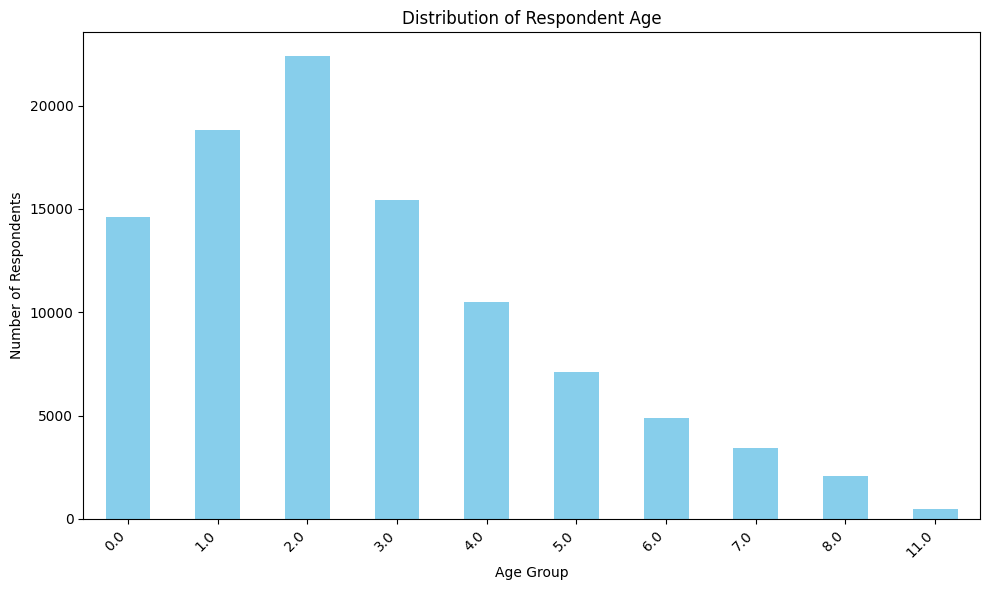

In [26]:
age_distribution = df_new['What is your age (# years)?'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
age_distribution.plot(kind='bar', color='skyblue')
plt.title('Distribution of Respondent Age')
plt.xlabel('Age Group')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# distribution of gender

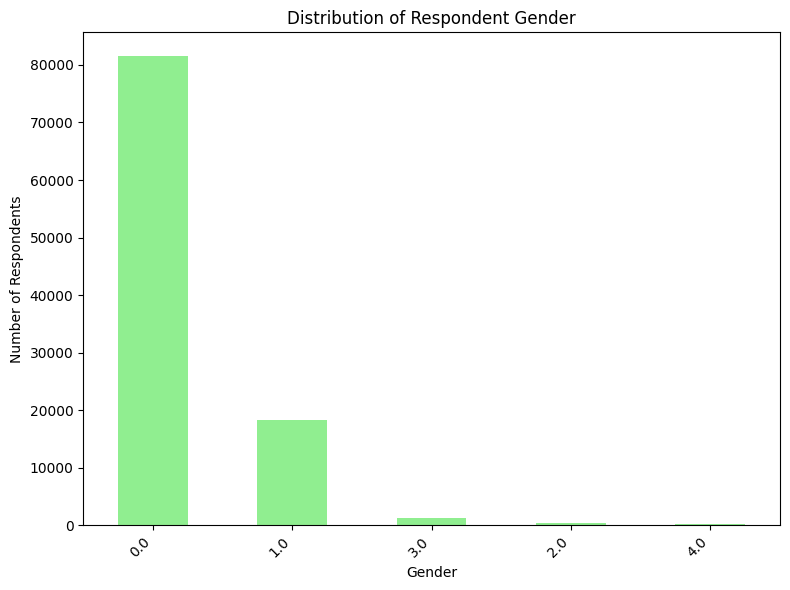

In [27]:
gender_distribution = df_new['What is your gender? - Selected Choice'].value_counts()

plt.figure(figsize=(8, 6))
gender_distribution.plot(kind='bar', color='lightgreen')
plt.title('Distribution of Respondent Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#distribution of education level

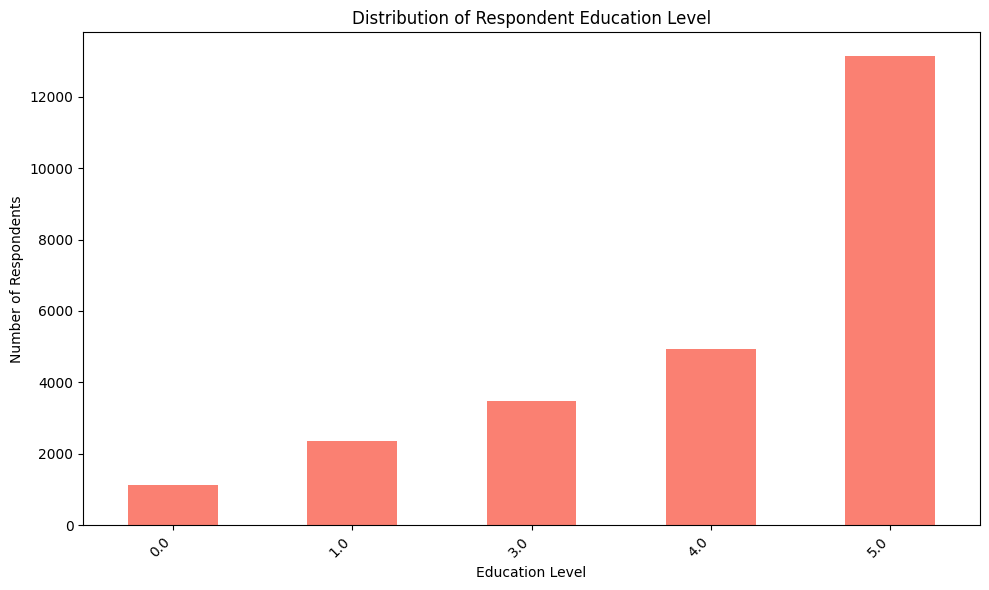

In [28]:
education_distribution = df_new['What is the highest level of formal education that you have attained or plan to attain within the next 2 years?'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
education_distribution.plot(kind='bar', color='salmon')
plt.title('Distribution of Respondent Education Level')
plt.xlabel('Education Level')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#distribution of roles

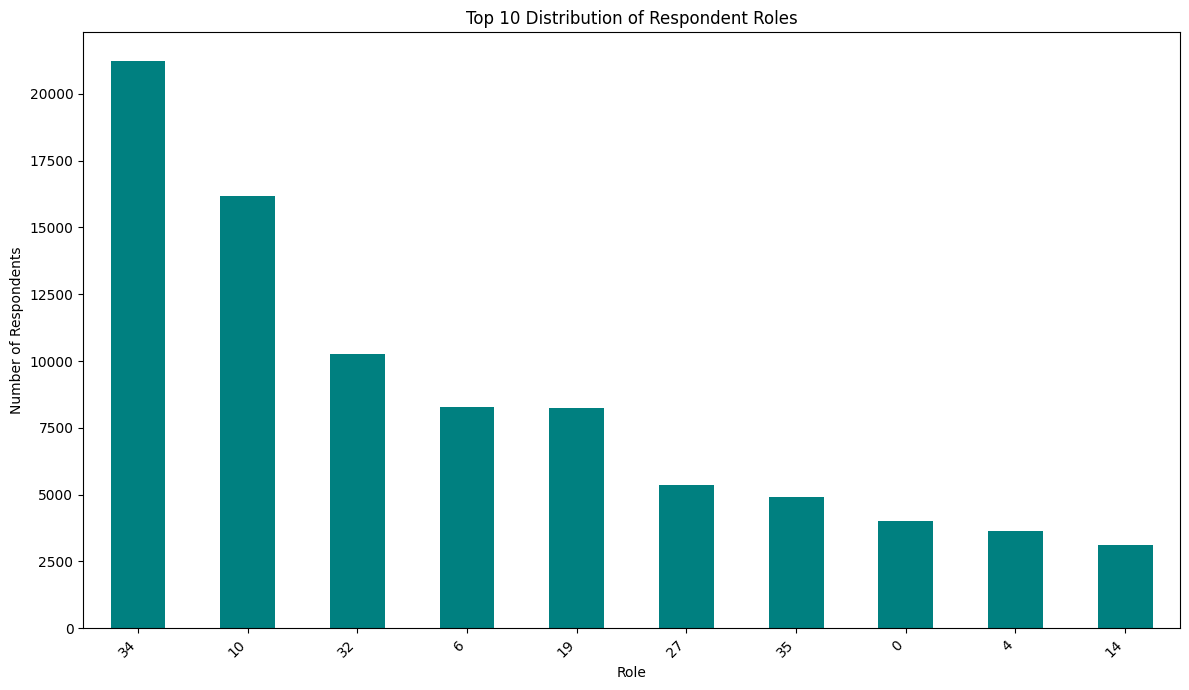

In [29]:
role_distribution = df_new['Select the title most similar to your current role (or most recent title if retired): - Selected Choice'].value_counts()
plt.figure(figsize=(12, 7))
role_distribution.head(10).plot(kind='bar', color='teal')
plt.title('Top 10 Distribution of Respondent Roles')
plt.xlabel('Role')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#distribution of coding experience

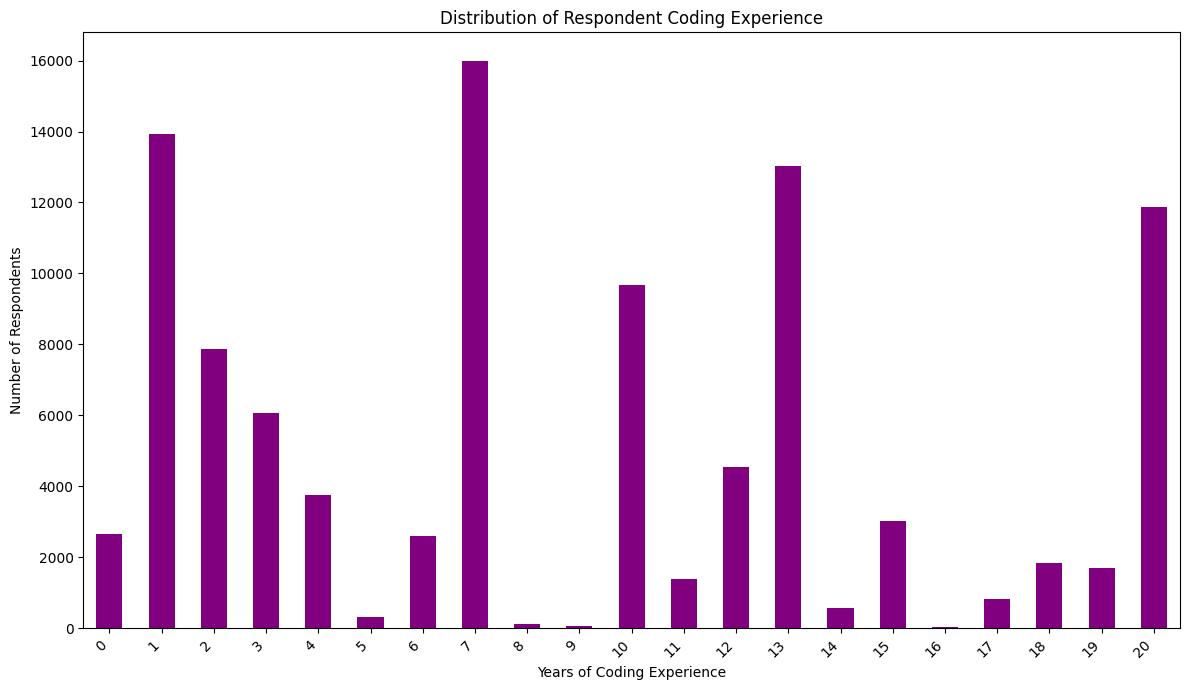

In [30]:
coding_experience_distribution = df_new['For how many years have you been writing code and/or programming?'].value_counts().sort_index()
plt.figure(figsize=(12, 7))
coding_experience_distribution.plot(kind='bar', color='purple')
plt.title('Distribution of Respondent Coding Experience')
plt.xlabel('Years of Coding Experience')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [31]:
language_cols = [col for col in df_new.columns if 'What programming languages do you use on a regular basis?' in col]
programming_language_counts = {}




#count of non-null values for each language
for col in language_cols:
    language = col.split(' - ')[-1]
    programming_language_counts[language] = df_new[col].value_counts().get(0, 0)

programming_language_series = pd.Series(programming_language_counts).sort_values(ascending=False)
print("Distribution of Programming Languages Used:")
display(programming_language_series)

Distribution of Programming Languages Used:


,0
None,101845
Python,65942
SQL,33090
R,20884
Java,14402
C++,11618
C,9696
Javascript,9501
MATLAB,9320
Bash,8737
